# 03.02 - Demand Data - Impute Missing Values & Deal with Outliers

 + Imports & Setup
 + Missing Data: December 2001
     + Impute Missing Month
 + Outlier
     + Deal with Power Outage
 + Review Pocessed Data


## Imports & setup

In [1]:
import pathlib
import datetime
from os import PathLike
from typing import Union

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

PROJECT_DIR = pathlib.Path.cwd().parent.resolve()
COMPILED_DATA_DIR_DEMAND = PROJECT_DIR / 'data' / '02-compiled' / 'demand'
IMPUTED_DATA_DIR_DEMAND = PROJECT_DIR / 'data' / '03-imputed' / 'demand'

## Missing Data: December 2001

In [2]:
df = pd.read_csv(COMPILED_DATA_DIR_DEMAND / 'demand.csv', index_col=0, parse_dates=True)
df.head()

,ont_demand
1994-01-01 00:00:00,14422.0
1994-01-01 01:00:00,13845.0
1994-01-01 02:00:00,13372.0
1994-01-01 03:00:00,13025.0
1994-01-01 04:00:00,12869.0


Plot the December data for the years either side of the missing data using a common y scale

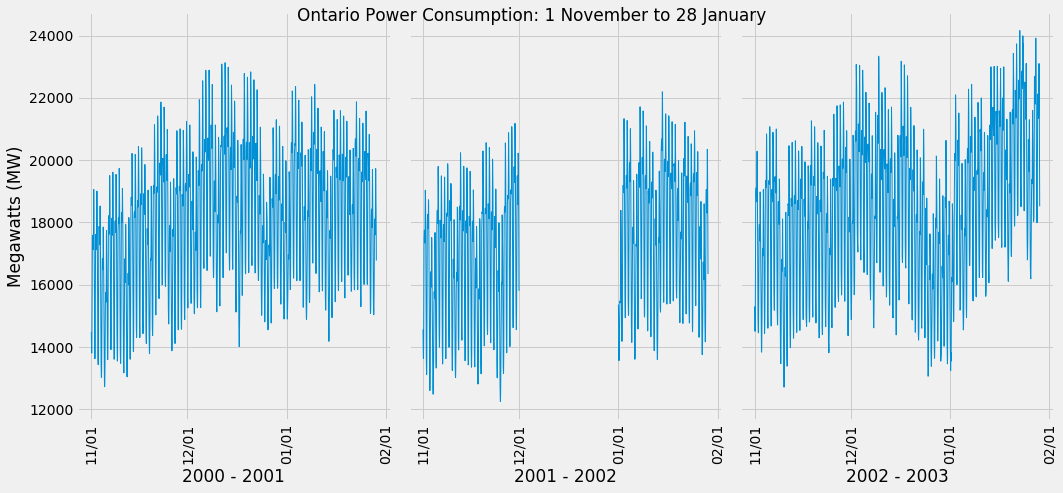

In [3]:
plt.style.use('fivethirtyeight')
myFmt = DateFormatter("%m/%d") 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,7), sharey=True)
ax1.plot(df.loc['2000-11-01':'2001-01-28'], linewidth=1)
ax2.plot(df.loc['2001-11-01':'2002-01-28'], linewidth=1)
ax3.plot(df.loc['2002-11-01':'2003-01-28'], linewidth=1)

ax1.xaxis.set_major_formatter(myFmt) ; ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(myFmt) ; ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(myFmt) ; ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax1.set_xlabel('2000 - 2001')
ax2.set_xlabel('2001 - 2002')
ax3.set_xlabel('2002 - 2003')

ax1.set_ylabel('Megawatts (MW)')
plt.suptitle('Ontario Power Consumption: 1 November to 28 January')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

On the basis of a visual comparison, I think that 2000 - 2001 is the closest pattern to 2001 - 2002. Therefore, I will take the 2000 data and map the days across to equivalent days in the missing portion of 2001

It is not as simple as a day for day substitute. For example, we want to use Monday 25 December 2000 as a substitute for Tuesday 25 december 2001 - ie use the same date. However, we want to use Monday 4 December 2000 as a substitute for Monday 3 December 2001.

The equivalent months are shown below, and the mapping is captured in the `imputed_vals` variable

### Impute Missing Month

![alt text](images/impute-missing-month.PNG)

In [4]:
start = '2001-12-01 00:00:00' ; end = '2001-12-31 23:00:00' ; freq = '1h'

# Get all the inputed values into an array
imputed_vals = [*list(df.loc['2000-12-02' : '2000-12-24', 'ont_demand'].values),
                *df.loc['2000-12-27', 'ont_demand'].values,
                
                *df.loc['2000-12-25', 'ont_demand'].values,
                *df.loc['2000-12-26', 'ont_demand'].values,
                *df.loc['2000-12-28' : '2000-12-31', 'ont_demand'].values,
                *df.loc['2000-12-29', 'ont_demand'].values               
               ]

df.loc[start : end, 'ont_demand'] = imputed_vals

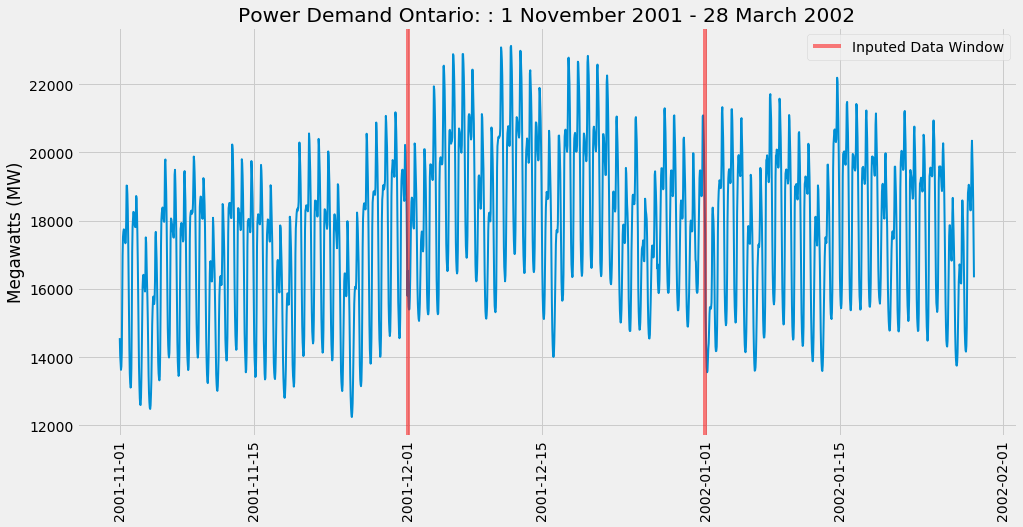

In [5]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df.loc['2001-11-01':'2002-01-28'], linewidth=2)
ax.axvline(start, color='r', alpha=0.5, label='Inputed Data Window')
ax.axvline(end, color='r', alpha=0.5)
ax.set_ylabel('Megawatts (MW)')
ax.set_title('Power Demand Ontario: : 1 November 2001 - 28 March 2002')
plt.xticks(rotation=90)
plt.legend()
plt.show();

## Outlier

### Deal with Power Outage

A substitution technique is used to deal with the outlier data associated with the Northeast power outage of 2003

The substitute days are shown below:

![alt text](images/impute-northeast-outage.PNG)

The substitute values are caoptured in the variable `imputed_vals`

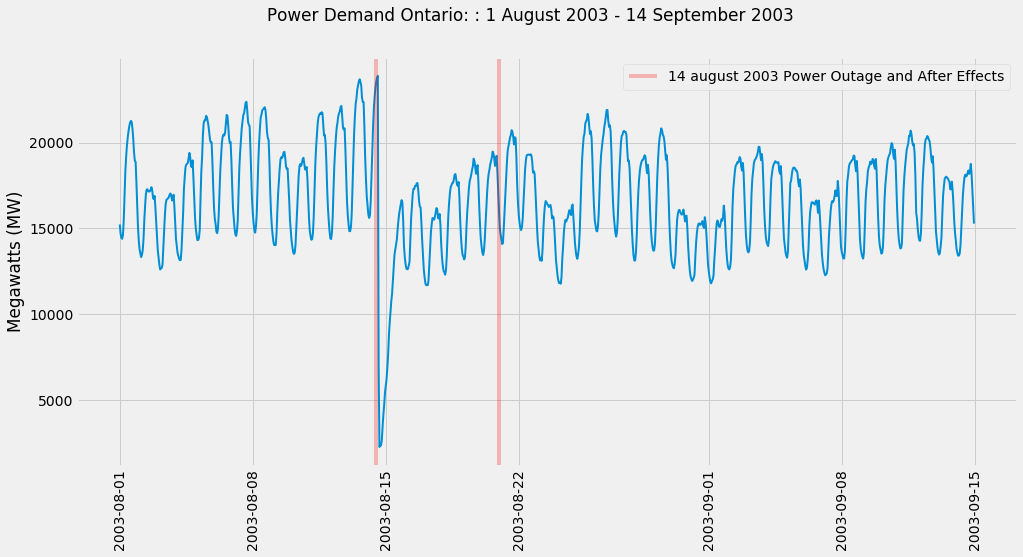

In [6]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df.loc['2003-08-01':'2003-09-14'], linewidth=2)
ax.axvline('2003-08-14 12:00:00', color='r', alpha=0.25, label='14 august 2003 Power Outage and After Effects')
ax.axvline('2003-08-20 23:00:00', color='r', alpha=0.25)
ax.set_ylabel('Megawatts (MW)')
plt.suptitle('Power Demand Ontario: : 1 August 2003 - 14 September 2003')
plt.xticks(rotation=90)
plt.legend()
plt.show();

In [7]:
start = '2003-08-14 00:00:00' ; end = '2003-08-20 23:00:00'
#index_2001 = pd.DatetimeIndex(freq=freq, start=start, end=end)

# Get all the inputed values into an array
imputed_vals = list(df.loc['2003-08-07' : '2003-08-13', 'ont_demand'].values)

df.loc[start : end, 'ont_demand'] = imputed_vals

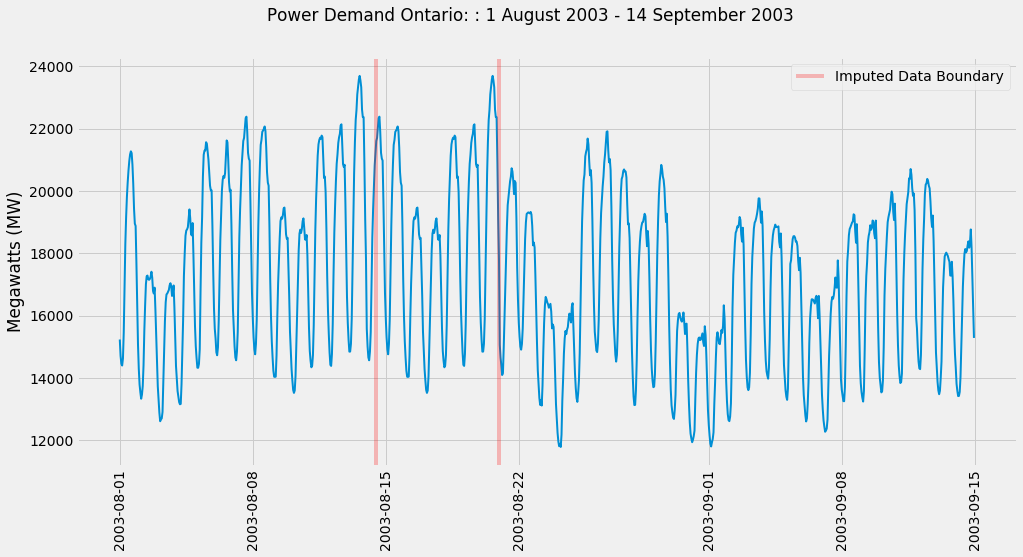

In [8]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df.loc['2003-08-01':'2003-09-14'], linewidth=2)
ax.axvline('2003-08-14 12:00:00', color='r', alpha=0.25, label='Imputed Data Boundary')
ax.axvline('2003-08-20 23:00:00', color='r', alpha=0.25)
ax.set_ylabel('Megawatts (MW)')
plt.suptitle('Power Demand Ontario: : 1 August 2003 - 14 September 2003')
plt.xticks(rotation=90)
plt.legend()
plt.show();

In [9]:
df.to_csv(IMPUTED_DATA_DIR_DEMAND / "demand.csv")

## Review Processed Data

In [10]:
df = pd.read_csv(IMPUTED_DATA_DIR_DEMAND / 'demand.csv', index_col=0, parse_dates=True)
df.head()

,ont_demand
1994-01-01 00:00:00,14422.0
1994-01-01 01:00:00,13845.0
1994-01-01 02:00:00,13372.0
1994-01-01 03:00:00,13025.0
1994-01-01 04:00:00,12869.0


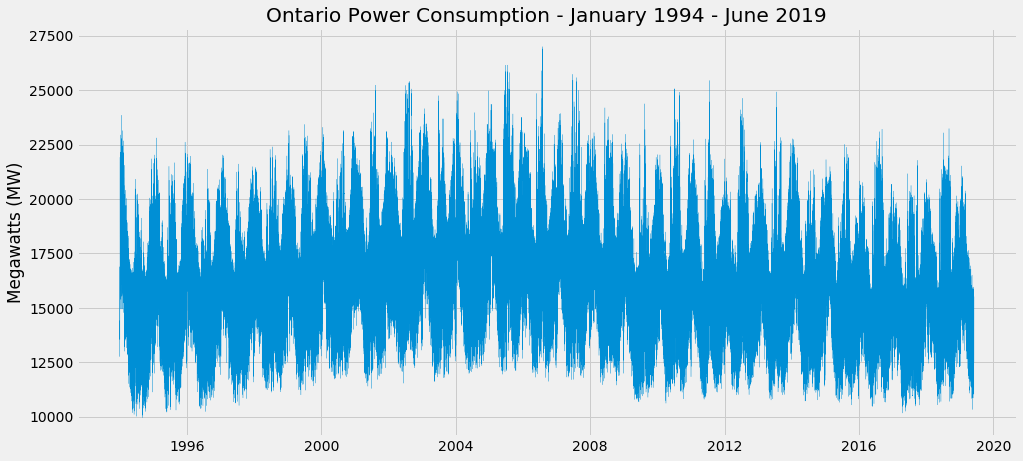

In [11]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df, linewidth=0.25)
ax.set_ylabel('Megawatts (MW)')
ax.set_title('Ontario Power Consumption - January 1994 - June 2019')
plt.show();

####  Look Closer at 2000 to 2003

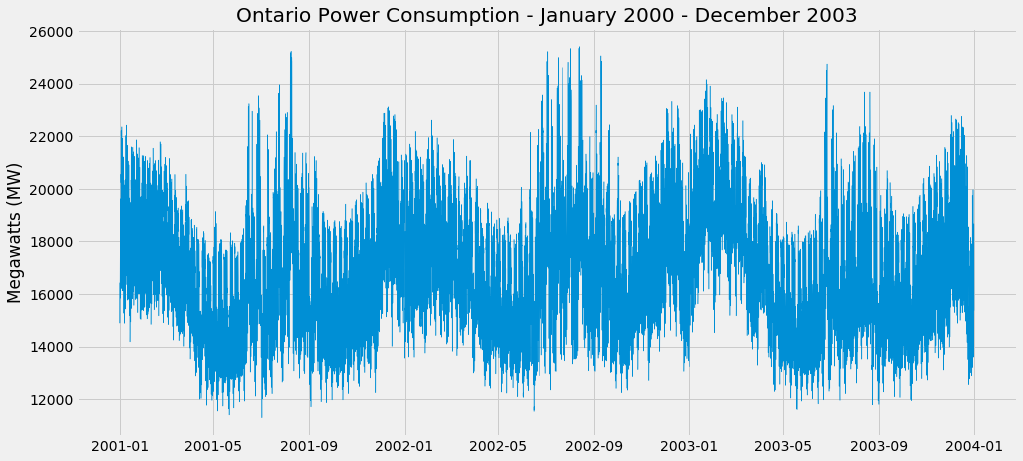

In [12]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df.loc['2001-01-01' : '2003-12-31', 'ont_demand'], linewidth=0.5)
ax.set_ylabel('Megawatts (MW)')
ax.set_title('Ontario Power Consumption - January 2000 - December 2003')
plt.show();